# ===========================================
# 1. Setup & Imports
# ===========================================

In [8]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
import plotly.graph_objects as go
import plotly.express as px
import plotly.subplots as sp
from pathlib import Path


# 2. Define File Paths

In [9]:
DATA_DIR = Path(r"C:\Users\Diogo\Desktop\Untitled Folder\data")

REGULAR_PATH = DATA_DIR / "Regular_Season.csv"
PLAYOFFS_PATH = DATA_DIR / "Playoffs.csv"

OUT_DIR = DATA_DIR / "outputs"
OUT_DIR.mkdir(exist_ok=True)

# ===========================================
# Load CSV Files
# ===========================================
def safe_read_csv(path):
    if not path.exists():
        raise FileNotFoundError(f"File not found: {path}")
    return pd.read_csv(path)

print("Loading files...")
regular_df = safe_read_csv(REGULAR_PATH)
playoffs_df = safe_read_csv(PLAYOFFS_PATH)
print(f"Regular shape: {regular_df.shape}; Playoffs shape: {playoffs_df.shape}")

# quick preview
display(regular_df.head(3))
display(playoffs_df.head(3))

# -------------------------
# 4) Preliminary Inspection
# -------------------------
def overview(df, name):
    print(f"\n--- Overview: {name} ---")
    print("Shape:", df.shape)
    print("\nColumns:", list(df.columns))
    print("\nMissing values (top 20):\n", df.isnull().sum().sort_values(ascending=False).head(20))
    print("\nDtypes:\n", df.dtypes.value_counts())
    print("\nSample rows:")
    display(df.sample(5))

overview(regular_df, "Regular Season")
overview(playoffs_df, "Playoffs")

Loading files...
Regular shape: (6259, 31); Playoffs shape: (2576, 31)


,Unnamed: 0.1,Unnamed: 0,year,Season_type,PLAYER_ID,RANK,PLAYER,TEAM_ID,TEAM,GP,...,DREB,REB,AST,STL,BLK,TOV,PF,PTS,AST_TOV,STL_TOV
0,0,0,2012-13,Regular_Season,201142,1,Kevin Durant,1610612760,OKC,81,...,594,640,374,116,105,280,143,2280,1.34,0.41
1,1,1,2012-13,Regular_Season,977,2,Kobe Bryant,1610612747,LAL,78,...,367,433,469,106,25,287,173,2133,1.63,0.37
2,2,2,2012-13,Regular_Season,2544,3,LeBron James,1610612748,MIA,76,...,513,610,551,129,67,226,110,2036,2.44,0.57


,Unnamed: 0.1,Unnamed: 0,year,Season_type,PLAYER_ID,RANK,PLAYER,TEAM_ID,TEAM,GP,...,DREB,REB,AST,STL,BLK,TOV,PF,PTS,AST_TOV,STL_TOV
0,0,468,2012-13,Playoffs,2544,1,LeBron James,1610612748,MIA,23,...,156,193,152,41,18,70,43,596,2.17,0.59
1,1,469,2012-13,Playoffs,2225,2,Tony Parker,1610612759,SAS,21,...,54,68,146,24,3,53,26,432,2.75,0.45
2,2,470,2012-13,Playoffs,1495,3,Tim Duncan,1610612759,SAS,21,...,160,214,40,18,34,42,53,381,0.95,0.43



--- Overview: Regular Season ---
Shape: (6259, 31)

Columns: ['Unnamed: 0.1', 'Unnamed: 0', 'year', 'Season_type', 'PLAYER_ID', 'RANK', 'PLAYER', 'TEAM_ID', 'TEAM', 'GP', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'AST_TOV', 'STL_TOV']

Missing values (top 20):
 Unnamed: 0.1    0
FG3_PCT         0
AST_TOV         0
PTS             0
PF              0
TOV             0
BLK             0
STL             0
AST             0
REB             0
DREB            0
OREB            0
FT_PCT          0
FTA             0
FTM             0
FG3A            0
Unnamed: 0      0
FG3M            0
FG_PCT          0
FGA             0
dtype: int64

Dtypes:
 int64      22
float64     5
object      4
Name: count, dtype: int64

Sample rows:


,Unnamed: 0.1,Unnamed: 0,year,Season_type,PLAYER_ID,RANK,PLAYER,TEAM_ID,TEAM,GP,...,DREB,REB,AST,STL,BLK,TOV,PF,PTS,AST_TOV,STL_TOV
3027,3027,4287,2018-19,Regular_Season,1628374,84,Lauri Markkanen,1610612741,CHI,52,...,396,470,75,37,33,85,122,974,0.88,0.43
2399,2399,3234,2016-17,Regular_Season,1626151,482,Aaron Harrison,1610612766,CHA,5,...,3,3,3,0,0,0,2,1,0.00,0.00
5075,5075,7003,2021-22,Regular_Season,1630582,530,Yves Pons,1610612763,MEM,12,...,7,12,1,1,4,1,6,13,1.00,1.00
2626,2626,3676,2017-18,Regular_Season,202692,223,Alec Burks,1610612762,UTA,64,...,173,192,67,37,8,60,75,494,1.12,0.62
3797,3797,5269,2019-20,Regular_Season,1629059,323,Elie Okobo,1610612756,PHX,55,...,74,90,115,24,4,38,54,219,3.03,0.63



--- Overview: Playoffs ---
Shape: (2576, 31)

Columns: ['Unnamed: 0.1', 'Unnamed: 0', 'year', 'Season_type', 'PLAYER_ID', 'RANK', 'PLAYER', 'TEAM_ID', 'TEAM', 'GP', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'AST_TOV', 'STL_TOV']

Missing values (top 20):
 Unnamed: 0.1    0
FG3_PCT         0
AST_TOV         0
PTS             0
PF              0
TOV             0
BLK             0
STL             0
AST             0
REB             0
DREB            0
OREB            0
FT_PCT          0
FTA             0
FTM             0
FG3A            0
Unnamed: 0      0
FG3M            0
FG_PCT          0
FGA             0
dtype: int64

Dtypes:
 int64      22
float64     5
object      4
Name: count, dtype: int64

Sample rows:


,Unnamed: 0.1,Unnamed: 0,year,Season_type,PLAYER_ID,RANK,PLAYER,TEAM_ID,TEAM,GP,...,DREB,REB,AST,STL,BLK,TOV,PF,PTS,AST_TOV,STL_TOV
403,403,1353,2013-14,Playoffs,203086,185,Meyers Leonard,1610612757,POR,4,...,2,2,0,0,0,0,1,0,0.00,0.00
2238,2238,7925,2022-23,Playoffs,200782,94,P.J. Tucker,1610612755,PHI,11,...,32,50,16,13,3,5,28,54,3.20,2.60
2117,2117,7265,2021-22,Playoffs,1626246,190,Boban Marjanovic,1610612742,DAL,3,...,3,3,0,1,0,2,0,4,0.00,0.50
1419,1419,4893,2018-19,Playoffs,203922,158,Glenn Robinson III,1610612765,DET,3,...,5,7,2,2,0,1,5,13,2.00,2.00
1102,1102,4046,2017-18,Playoffs,203468,53,CJ McCollum,1610612757,POR,4,...,8,8,14,5,1,9,11,101,1.56,0.56


# 3. Data Inspection and Cleaning

In [10]:
# -------------------------
# Standardize Columns & Detect Key Fields
# -------------------------
# Lowercase column names for consistency (but keep a copy of original)
regular_df.columns = [c.strip() for c in regular_df.columns]
playoffs_df.columns = [c.strip() for c in playoffs_df.columns]

# Common expected columns (based on README): Player, Team/TEAM, GP, MIN, PTS, FGM, FGA, FG_PCT, FG3M, ...
# Normalize column names to a known set where possible
def normalize_cols(df):
    col_map = {}
    for c in df.columns:
        c_up = c.upper()
        if c_up in ["PLAYER", "PLAYER NAME", "NAME"]:
            col_map[c] = "Player"
        elif c_up in ["TEAM", "TM", "TEAM_ABBR"]:
            col_map[c] = "TEAM"
        elif c_up in ["SEASON", "YEAR"]:
            col_map[c] = "Season"
        else:
            # preserve case for standard stat columns like PTS, REB, AST, etc.
            col_map[c] = c
    df = df.rename(columns=col_map)
    return df

regular_df = normalize_cols(regular_df)
playoffs_df = normalize_cols(playoffs_df)

print("Post-normalization columns (Regular):", regular_df.columns.tolist())
print("Post-normalization columns (Playoffs):", playoffs_df.columns.tolist())

# -------------------------
# Ensure numeric columns are numeric
# -------------------------
# Identify numeric-like columns by common stat names
stat_cols_candidates = [
    "GP","MIN","PTS","FGM","FGA","FG_PCT","FG3M","FG3A","FG3_PCT",
    "FTM","FTA","FT_PCT","OREB","DREB","REB","AST","STL","BLK",
    "TOV","PF"
]
# find available numeric columns
def coerce_numeric(df):
    for col in df.columns:
        col_clean = col.strip()
        if col_clean.upper() in stat_cols_candidates or col_clean in stat_cols_candidates:
            df[col_clean] = pd.to_numeric(df[col_clean], errors='coerce')
    return df

regular_df = coerce_numeric(regular_df)
playoffs_df = coerce_numeric(playoffs_df)

# If % columns are strings with percent sign, try to remove %
for df in (regular_df, playoffs_df):
    for c in df.columns:
        if df[c].dtype == object:
            # if entries have %, strip and convert
            sample = df[c].dropna().astype(str).head(5).tolist()
            if any('%' in s for s in sample):
                df[c] = df[c].astype(str).str.replace('%','').str.strip()
                df[c] = pd.to_numeric(df[c], errors='coerce')

# -------------------------
# Add SeasonType and Harmonize Player Names
# -------------------------
regular_df['SeasonType'] = 'Regular'
playoffs_df['SeasonType'] = 'Playoffs'

# Trim whitespace in Player & TEAM columns if they exist
for df in (regular_df, playoffs_df):
    if 'Player' in df.columns:
        df['Player'] = df['Player'].astype(str).str.strip()
    if 'TEAM' in df.columns:
        df['TEAM'] = df['TEAM'].astype(str).str.strip()

# Combine into a single dataframe for convenience
nba_df = pd.concat([regular_df, playoffs_df], ignore_index=True, sort=False)
print("Combined NBA df shape:", nba_df.shape)

# -------------------------
# Duplicates & Missing Values Handling
# -------------------------
print("\nDuplicates before:", nba_df.duplicated().sum())
nba_df = nba_df.drop_duplicates()
print("Duplicates after drop:", nba_df.duplicated().sum())

# Missing values: strategy:
# - For missing numeric stat fields, fill with 0 only if reasonable (e.g., FGM missing likely 0)
# - For missing TEAM or Player, keep them (but flag)
numeric_cols = nba_df.select_dtypes(include=[np.number]).columns.tolist()
nba_df[numeric_cols] = nba_df[numeric_cols].fillna(0)

# Create missing value summary for any non-numeric columns
missing_non_numeric = nba_df.isnull().sum()[nba_df.isnull().sum() > 0]
print("\nRemaining missing counts (non-numeric):")
print(missing_non_numeric)

# -------------------------
# Outliers detection (simple) & Winsorization option
# -------------------------
# We'll compute z-scores for key stats and flag extreme values (z > 4)
from scipy import stats
key_stats = ['PTS','REB','AST','FG_PCT','FG3_PCT','FT_PCT','TOV','MIN']
present_key_stats = [s for s in key_stats if s in nba_df.columns]

z = np.abs(stats.zscore(nba_df[present_key_stats].replace([np.inf, -np.inf], np.nan).fillna(0)))
z_scores = pd.DataFrame(z, columns=present_key_stats, index=nba_df.index)
outlier_mask = (z_scores > 4).any(axis=1)
print(f"Outliers flagged (z>4) in key stats: {outlier_mask.sum()} rows")

# For portfolio EDA we will not drop outliers automatically; we will mark them
nba_df['outlier_flag'] = outlier_mask

# -------------------------
# Save cleaned combined CSV 
# -------------------------
CLEANED_PATH = OUT_DIR / "nba_combined_cleaned.csv"
nba_df.to_csv(CLEANED_PATH, index=False)
print(f"Cleaned combined dataset saved to: {CLEANED_PATH}")

Post-normalization columns (Regular): ['Unnamed: 0.1', 'Unnamed: 0', 'Season', 'Season_type', 'PLAYER_ID', 'RANK', 'Player', 'TEAM_ID', 'TEAM', 'GP', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'AST_TOV', 'STL_TOV']
Post-normalization columns (Playoffs): ['Unnamed: 0.1', 'Unnamed: 0', 'Season', 'Season_type', 'PLAYER_ID', 'RANK', 'Player', 'TEAM_ID', 'TEAM', 'GP', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'AST_TOV', 'STL_TOV']
Combined NBA df shape: (8835, 32)

Duplicates before: 0
Duplicates after drop: 0

Remaining missing counts (non-numeric):
Series([], dtype: int64)
Outliers flagged (z>4) in key stats: 282 rows
Cleaned combined dataset saved to: C:\Users\Diogo\Desktop\Untitled Folder\data\outputs\nba_combined_cleaned.csv


# 4. Descriptive Stats

In [11]:
print("\n--- Descriptive statistics for numeric columns ---")
display(nba_df[present_key_stats].describe().T)

# -----------------------------------------------
# 1️⃣ Season averages per player (Regular + Playoffs)
# -----------------------------------------------

group_cols = ['Player', 'Season', 'SeasonType']  # group by Season

required_cols = ['PTS', 'REB', 'AST', 'MIN', 'GP']
missing_cols = [c for c in required_cols if c not in nba_df.columns]
if missing_cols:
    raise ValueError(f"Missing required columns: {missing_cols}")

# Aggregate player totals per season
player_season_avgs = (
    nba_df.groupby(group_cols, as_index=False)
    .agg({'PTS':'sum', 'REB':'sum', 'AST':'sum', 'MIN':'sum', 'GP':'sum'})
)

# Compute per-game averages for players
for stat in ['PTS', 'REB', 'AST', 'MIN']:
    player_season_avgs[f'{stat}_AVG'] = player_season_avgs[stat] / player_season_avgs['GP']

player_season_avgs = player_season_avgs.round({'PTS_AVG':2, 'REB_AVG':2, 'AST_AVG':2, 'MIN_AVG':1})

print("\nPlayer-season averages (sample):")
display(player_season_avgs.head())

# -----------------------------------------------
# 2️⃣ Team season averages (if TEAM column present)
# -----------------------------------------------

if 'TEAM' in nba_df.columns:
    # Group by TEAM, Season, SeasonType
    group_cols = ['TEAM', 'Season', 'SeasonType']

    # Aggregate total stats per team-season
    team_season_totals = (
        nba_df.groupby(group_cols, as_index=False)
        .agg({
            'PTS':'sum',
            'REB':'sum',
            'AST':'sum',
            'GP':'max'  # max GP among players
        })
    )

    # Set TEAM_GP: 82 for regular season, max GP for playoffs
    team_season_totals['TEAM_GP'] = team_season_totals.apply(
        lambda row: 82 if row['SeasonType'].lower() == 'regular' else row['GP'], axis=1
    )

    # Compute per-game averages
    for stat in ['PTS', 'REB', 'AST']:
        team_season_totals[f'{stat}_AVG'] = team_season_totals[stat] / team_season_totals['TEAM_GP']

    # Round for readability
    team_season_avgs = team_season_totals.round({'PTS_AVG':1, 'REB_AVG':1, 'AST_AVG':1})

    print("\nTeam-season averages (corrected sample):")
    display(team_season_avgs.head())
else:
    team_season_avgs = pd.DataFrame()

# -----------------------------------------------
# 3️⃣ Player Leaderboards (top scorers / rebounders / assist leaders)
# -----------------------------------------------

leaders = {}
if 'regular_df' in locals() and not regular_df.empty:
    for stat in ['PTS', 'REB', 'AST']:
        if all(col in regular_df.columns for col in [stat, 'GP']):
            regular_df[f'{stat}_AVG'] = regular_df[stat] / regular_df['GP']
            
            top = (
                regular_df.groupby('Player', as_index=False)[f'{stat}_AVG']
                .mean()
                .sort_values(by=f'{stat}_AVG', ascending=False)
                .head(20)
            )
            
            leaders[stat] = top
            print(f"\nTop 10 players by {stat} (Regular Season per-game average):")
            display(top.head(10))
else:
    print("regular_df not defined or empty — skipping leaderboards.")

# -----------------------------------------------
# 4️⃣ Save Leaderboards to CSV
# -----------------------------------------------

OUT_DIR.mkdir(parents=True, exist_ok=True)
for stat, df_lead in leaders.items():
    out_path = OUT_DIR / f"leaderboard_{stat.lower()}.csv"
    df_lead.to_csv(out_path, index=False)
    print(f"✅ Saved: {out_path}")



--- Descriptive statistics for numeric columns ---


,count,mean,std,min,25%,50%,75%,max
PTS,8835.0,374.351896,437.467232,0.0,42.000,191.000,580.000,2818.0
REB,8835.0,152.578834,177.290498,0.0,20.000,86.000,231.000,1247.0
AST,8835.0,82.459989,115.606530,0.0,7.000,35.000,109.000,907.0
FG_PCT,8835.0,0.433898,0.135812,0.0,0.392,0.439,0.494,1.0
FG3_PCT,8835.0,0.272109,0.175926,0.0,0.167,0.324,0.375,1.0
FT_PCT,8835.0,0.673971,0.263281,0.0,0.621,0.750,0.833,1.0
TOV,8835.0,47.139898,55.854539,0.0,5.000,25.000,71.000,464.0
MIN,8835.0,844.860441,823.156717,0.0,129.000,526.000,1477.500,3167.0



Player-season averages (sample):


,Player,Season,SeasonType,PTS,REB,AST,MIN,GP,PTS_AVG,REB_AVG,AST_AVG,MIN_AVG
0,AJ Green,2022-23,Regular,154,45,22,345,35,4.40,1.29,0.63,9.9
1,AJ Green,2023-24,Playoffs,17,9,2,67,6,2.83,1.50,0.33,11.2
2,AJ Green,2023-24,Regular,252,64,30,614,56,4.50,1.14,0.54,11.0
3,AJ Griffin,2022-23,Regular,639,153,73,1401,72,8.88,2.12,1.01,19.5
4,AJ Griffin,2023-24,Regular,48,18,5,171,20,2.40,0.90,0.25,8.6



Team-season averages (corrected sample):


,TEAM,Season,SeasonType,PTS,REB,AST,GP,TEAM_GP,PTS_AVG,REB_AVG,AST_AVG
0,ATL,2012-13,Playoffs,536,230,115,6,6,89.3,38.3,19.2
1,ATL,2012-13,Regular,8107,3421,2032,80,82,98.9,41.7,24.8
2,ATL,2013-14,Playoffs,647,275,118,7,7,92.4,39.3,16.9
3,ATL,2013-14,Regular,8277,3274,2038,80,82,100.9,39.9,24.9
4,ATL,2014-15,Playoffs,1568,699,381,16,16,98.0,43.7,23.8



Top 10 players by PTS (Regular Season per-game average):


,Player,PTS_AVG
984,Luka Doncic,28.737375
894,Kevin Durant,27.649270
755,Joel Embiid,27.556363
652,James Harden,26.815578
962,LeBron James,26.739005
1372,Stephen Curry,26.149521
1438,Trae Young,25.725840
295,Damian Lillard,25.387346
407,Donovan Mitchell,25.051256
1561,Zion Williamson,24.592857



Top 10 players by REB (Regular Season per-game average):


,Player,REB_AVG
60,Andre Drummond,12.206674
1294,Rudy Gobert,11.492387
755,Joel Embiid,10.934948
1163,Nikola Vucevic,10.779398
1159,Nikola Jokic,10.765903
543,Hassan Whiteside,10.736525
1506,Victor Wembanyama,10.633803
355,Deandre Ayton,10.588268
866,Karl-Anthony Towns,10.569298
85,Anthony Davis,10.488585



Top 10 players by AST (Regular Season per-game average):


,Player,AST_AVG
1438,Trae Young,9.577997
241,Chris Paul,8.993461
1488,Tyrese Haliburton,8.707102
769,John Wall,8.638362
1297,Russell Westbrook,8.546855
652,James Harden,8.467613
984,Luka Doncic,8.320421
962,LeBron James,7.765290
1239,Rajon Rondo,7.705779
947,LaMelo Ball,7.548758


✅ Saved: C:\Users\Diogo\Desktop\Untitled Folder\data\outputs\leaderboard_pts.csv
✅ Saved: C:\Users\Diogo\Desktop\Untitled Folder\data\outputs\leaderboard_reb.csv
✅ Saved: C:\Users\Diogo\Desktop\Untitled Folder\data\outputs\leaderboard_ast.csv


# 5. Univariate Analysis

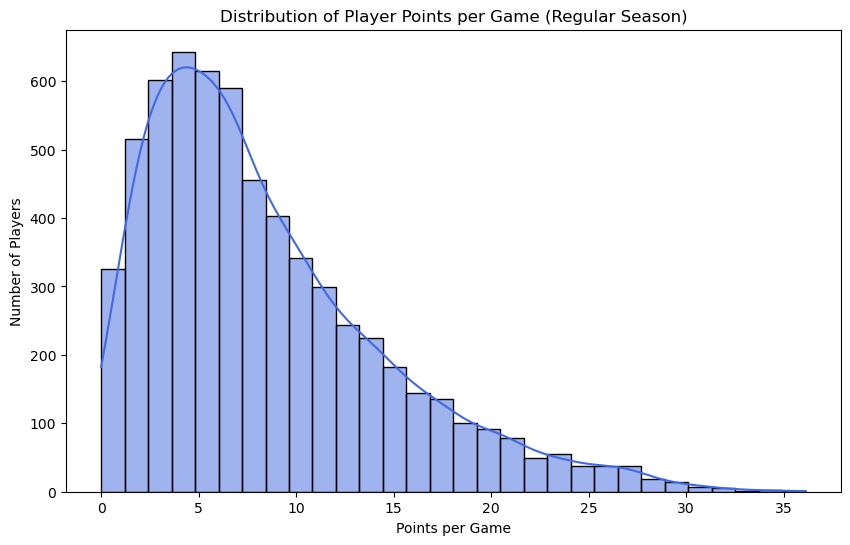

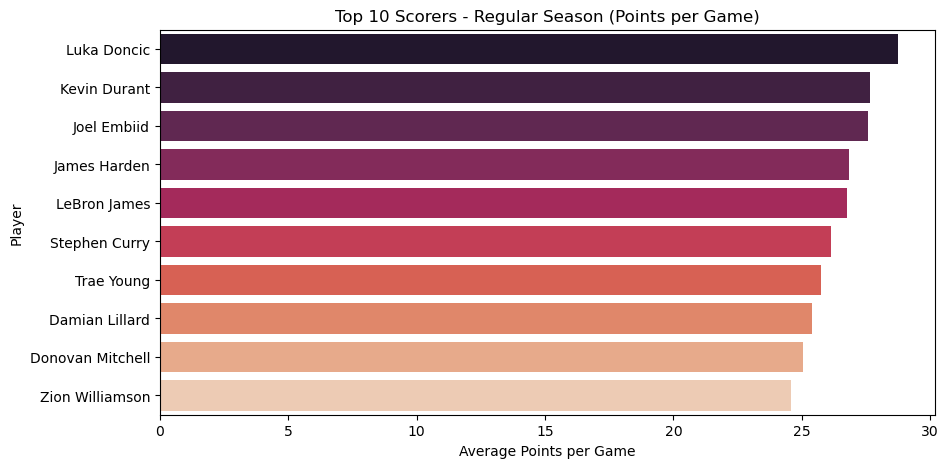

In [12]:
# -----------------------------------------------
# Distribution of Player Points per Game
# -----------------------------------------------
plt.figure(figsize=(10,6))
sns.histplot(regular_df['PTS_AVG'], bins=30, kde=True, color='royalblue')  # use PTS_AVG
plt.title("Distribution of Player Points per Game (Regular Season)")
plt.xlabel("Points per Game")
plt.ylabel("Number of Players")
plt.show()

# -----------------------------------------------
# Top 10 Scorers by Points per Game
# -----------------------------------------------
top_scorers = regular_df.groupby('Player')['PTS_AVG'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_scorers.values, y=top_scorers.index, palette='rocket')
plt.title("Top 10 Scorers - Regular Season (Points per Game)")
plt.xlabel("Average Points per Game")
plt.ylabel("Player")
plt.show()


# 6. Bivariate Analysis

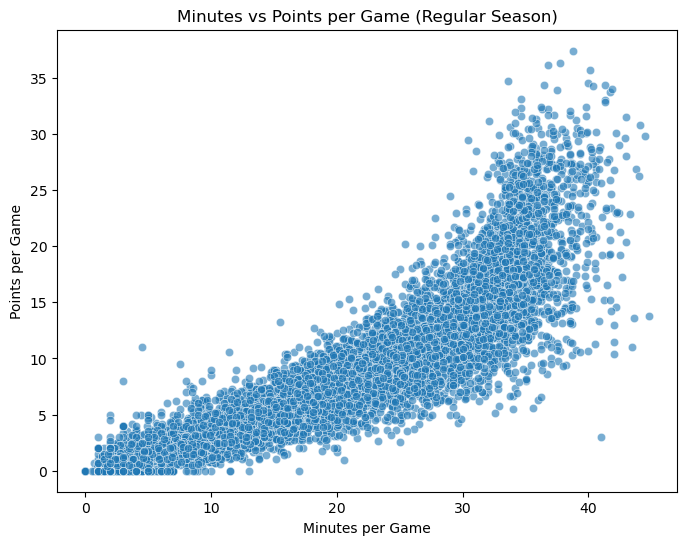

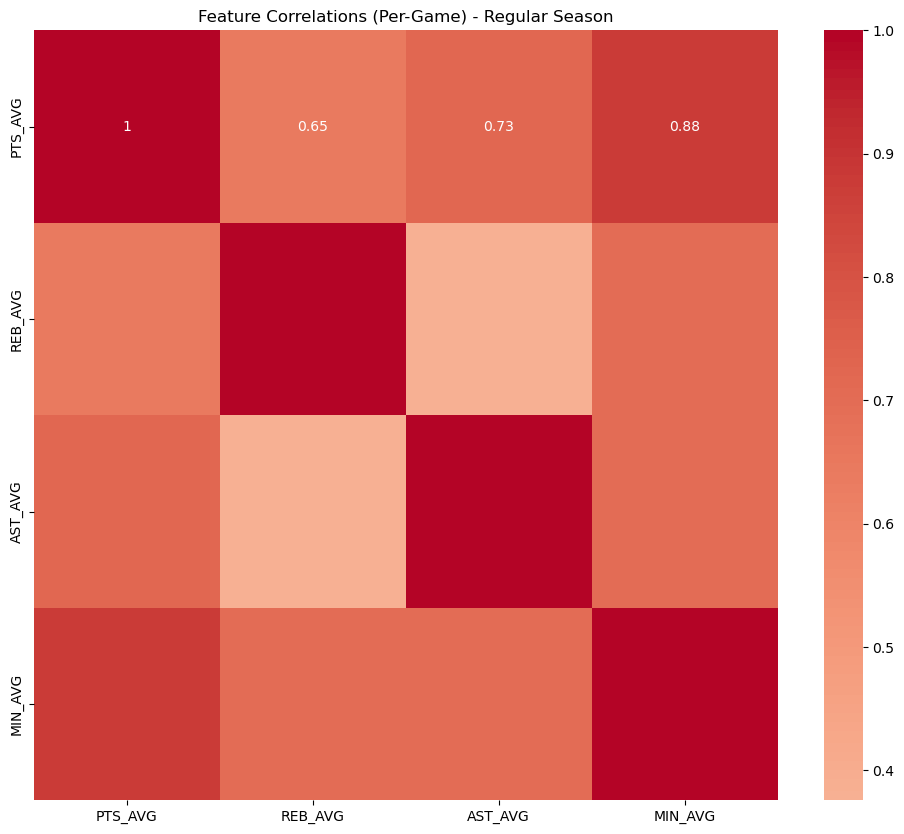

In [13]:
# Scatter plot: Minutes vs Points per Game
plt.figure(figsize=(8,6))
sns.scatterplot(data=player_season_avgs, x='MIN_AVG', y='PTS_AVG', alpha=0.6)
plt.title("Minutes vs Points per Game (Regular Season)")
plt.xlabel("Minutes per Game")
plt.ylabel("Points per Game")
plt.show()

# Correlation heatmap (per-game stats)
plt.figure(figsize=(12,10))
numeric_cols = [col for col in player_season_avgs.select_dtypes(include=np.number).columns if col.endswith('_AVG')]
corr = player_season_avgs[numeric_cols].corr()
sns.heatmap(corr, cmap='coolwarm', center=0, annot=True)
plt.title("Feature Correlations (Per-Game) - Regular Season")
plt.show()

# 7. Team-Level Insights

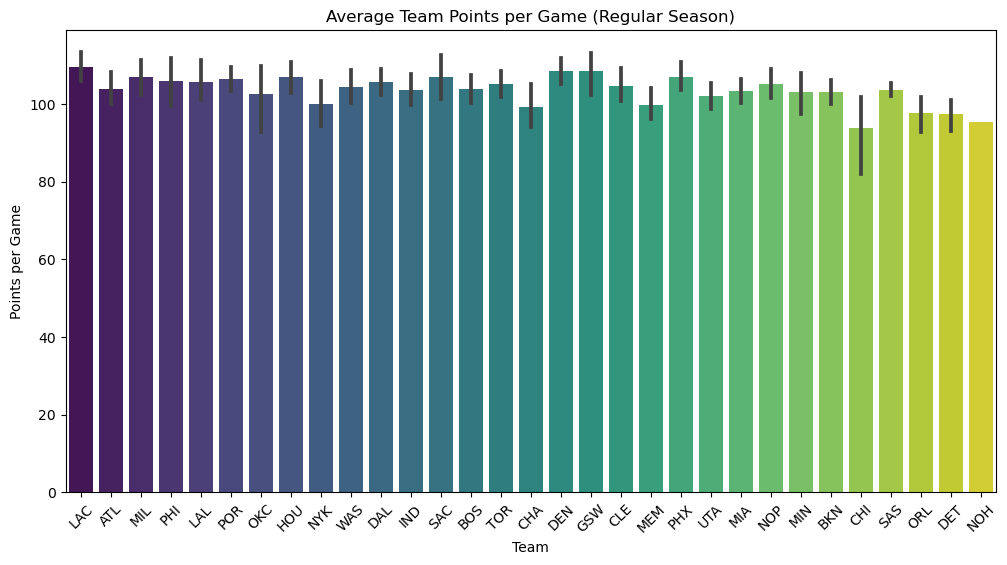

In [14]:
if 'team_season_avgs' in locals() and not team_season_avgs.empty:
    # Sort by PTS per game
    team_stats = team_season_avgs.sort_values(by='PTS_AVG', ascending=False)

    plt.figure(figsize=(12,6))
    sns.barplot(data=team_stats, x='TEAM', y='PTS_AVG', palette='viridis')
    plt.title("Average Team Points per Game (Regular Season)")
    plt.xlabel("Team")
    plt.ylabel("Points per Game")
    plt.xticks(rotation=45)
    plt.show()
else:
    print("team_season_avgs is not defined or empty. Compute team per-game averages first.")

# 8. Advanced Insights

## a) Efficiency

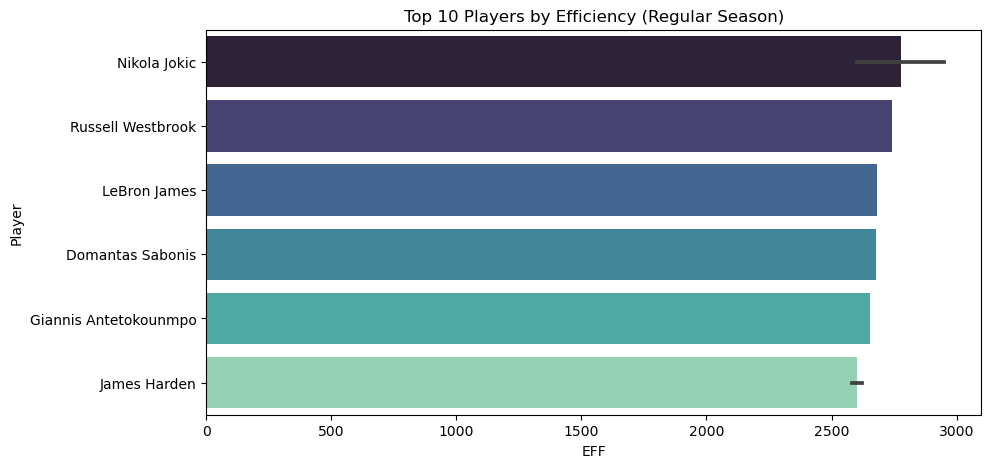

In [16]:
# Efficiency metric
regular_df['EFF'] = (
    regular_df['PTS'] + regular_df['REB'] + regular_df['AST'] + regular_df['STL'] + regular_df['BLK']
    - (regular_df['FGA'] - regular_df['FGM']) - (regular_df['FTA'] - regular_df['FTM']) - regular_df['TOV']
)

eff_top = regular_df.sort_values(by='EFF', ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x='EFF', y='Player', data=eff_top, palette='mako')
plt.title("Top 10 Players by Efficiency (Regular Season)")
plt.show()

## b) TOP 5 Players (Pts/Gm) Spider Graph

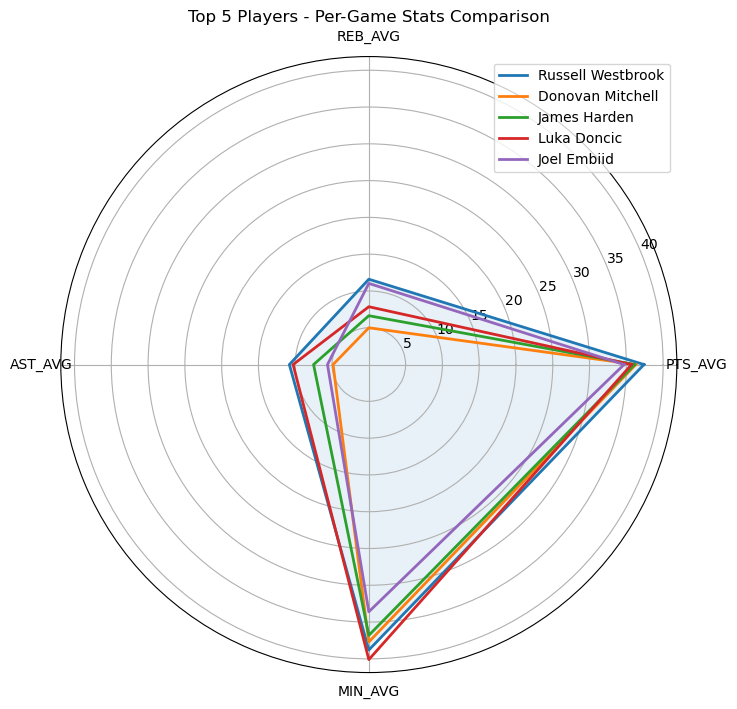

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Top 5 players by PTS per game
top_players = player_season_avgs.sort_values('PTS_AVG', ascending=False).head(5)
stats = ['PTS_AVG', 'REB_AVG', 'AST_AVG', 'MIN_AVG']

# Radar chart setup
angles = np.linspace(0, 2 * np.pi, len(stats), endpoint=False).tolist()
angles += angles[:1]

plt.figure(figsize=(8, 8))
for i, row in top_players.iterrows():
    values = row[stats].tolist()
    values += values[:1]  # close the circle
    plt.polar(angles, values, label=row['Player'], linewidth=2)

plt.fill(angles, top_players.iloc[0][stats].tolist() + [top_players.iloc[0][stats].tolist()[0]], alpha=0.1)
plt.xticks(angles[:-1], stats)
plt.title("Top 5 Players - Per-Game Stats Comparison")
plt.legend(loc='upper right')
plt.show()


## c) Line Plot Across Seasons for the Los Angeles Lakers

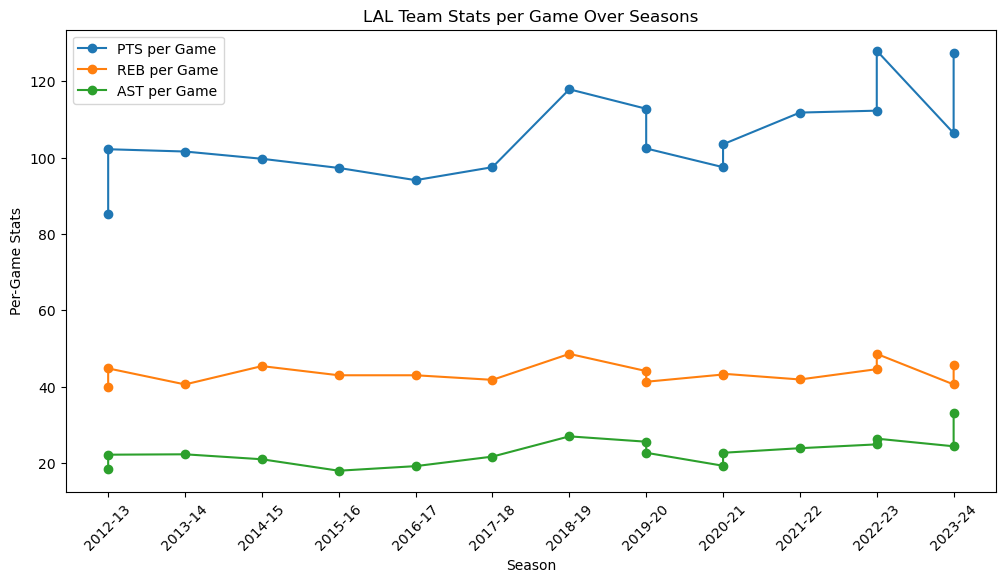

In [18]:
# Example: plot for team 'LAL'
team_data = team_season_avgs[team_season_avgs['TEAM'] == 'LAL']

plt.figure(figsize=(12,6))
plt.plot(team_data['Season'], team_data['PTS_AVG'], marker='o', label='PTS per Game')
plt.plot(team_data['Season'], team_data['REB_AVG'], marker='o', label='REB per Game')
plt.plot(team_data['Season'], team_data['AST_AVG'], marker='o', label='AST per Game')
plt.title("LAL Team Stats per Game Over Seasons")
plt.xlabel("Season")
plt.ylabel("Per-Game Stats")
plt.xticks(rotation=45)
plt.legend()
plt.show()

## d) TOP 10 Pts across Seasons Heatmap

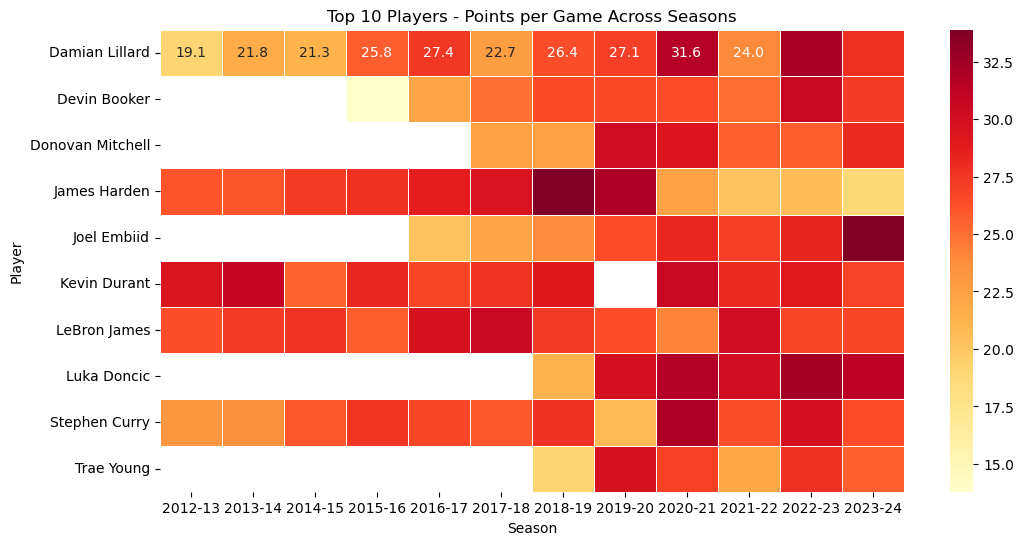

In [23]:
# Select top 10 players by average PTS_AVG across all seasons
top10_players = player_season_avgs.groupby('Player')['PTS_AVG'].mean()\
    .sort_values(ascending=False).head(10).index

# Filter for top 10 players
heatmap_data = player_season_avgs[player_season_avgs['Player'].isin(top10_players)]

# Aggregate per player per season to avoid duplicates
heatmap_data = heatmap_data.groupby(['Player', 'Season'], as_index=False)['PTS_AVG'].mean()

# Pivot to get players as rows, seasons as columns
heatmap_data = heatmap_data.pivot(index='Player', columns='Season', values='PTS_AVG')

# Plot heatmap
plt.figure(figsize=(12,6))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap='YlOrRd', linewidths=.5)
plt.title("Top 10 Players - Points per Game Across Seasons")
plt.ylabel("Player")
plt.xlabel("Season")
plt.show()

## e) Bubble 

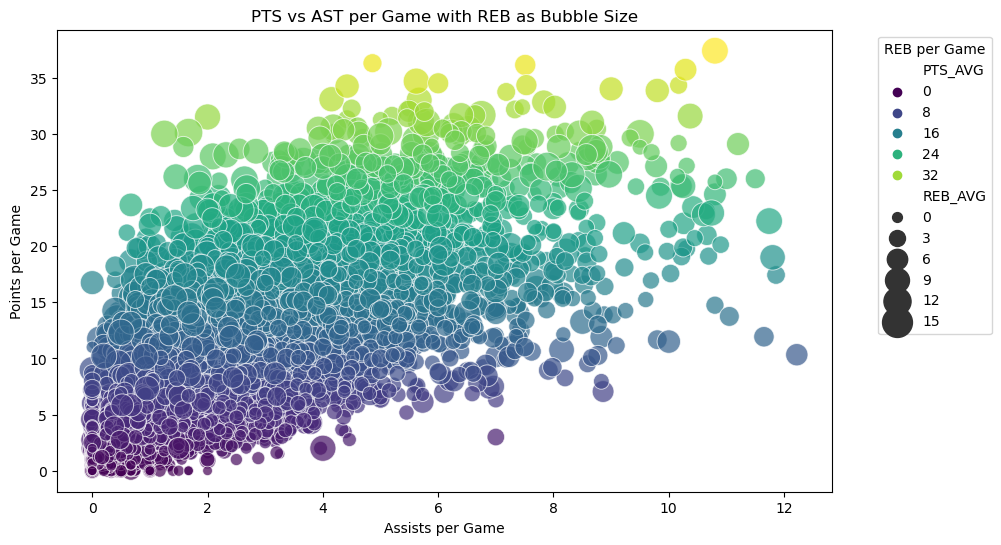

In [21]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=player_season_avgs, 
    x='AST_AVG', y='PTS_AVG', 
    size='REB_AVG', sizes=(50, 500), 
    hue='PTS_AVG', palette='viridis', alpha=0.7
)
plt.title("PTS vs AST per Game with REB as Bubble Size")
plt.xlabel("Assists per Game")
plt.ylabel("Points per Game")
plt.legend(title='REB per Game', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

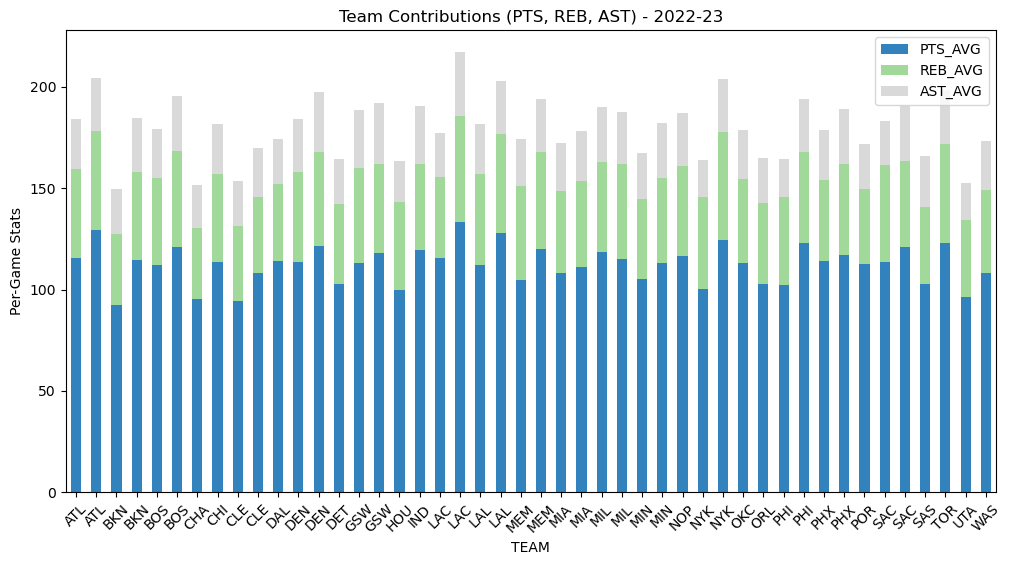

In [22]:
season_data = team_season_avgs[team_season_avgs['Season'] == '2022-23']  # example season
season_data.set_index('TEAM')[['PTS_AVG', 'REB_AVG', 'AST_AVG']].plot(kind='bar', stacked=True, figsize=(12,6), colormap='tab20c')
plt.title("Team Contributions (PTS, REB, AST) - 2022-23")
plt.ylabel("Per-Game Stats")
plt.xticks(rotation=45)
plt.show()

# 10. Save Cleaned & Derived Data

In [ ]:
clean_path = DATA_DIR / "NBA_cleaned.csv"
regular_df.to_csv(clean_path, index=False)
print(f"Cleaned dataset saved to: {clean_path}")